In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

### Dataset Description
This classic dataset contains the prices and other attributes of almost 54,000 diamonds.
### Attributes:
- **Price**: Price of the diamond in US dollars (\$326-\$18,823)
- **Carat**: Weight of the diamond measured in carats (0.2-5.01)
- **Cut**: Quality of the cut of the diamond (Fair, Good, Very Good, Premium, Ideal)
- **Color**: Diamond color, from J (worst) to D (best)
- **Clarity**: Measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **x, y, z**: Dimensions of the diamond in mm x: (0-10.74), y: (0-58.9), z: (0-31.8)
- **Depth**: Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43-79)
- **Table**: Width of top of diamond relative to its widest point (43-95)


In [ ]:
df=pd.read_csv("../data/diamonds.csv")
df.head()

The first column is just an index - it can be removed.

In [22]:
df = df.drop(["Unnamed: 0"], axis=1)
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


There are no null values, but there are 'dimentionless diamonds'.

In [23]:
(df['x']==0).sum()

8

In [24]:
(df['y']==0).sum()

7

In [25]:
(df['z']==0).sum()


20

There are few diamonds without dimention data. They can be dropped.

In [26]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

In [27]:
df_num=df[['carat','depth','table', 'price', 'x', 'y', 'z']]
df_cat=df[['cut','color','clarity']]

### Line plots for numerical values:

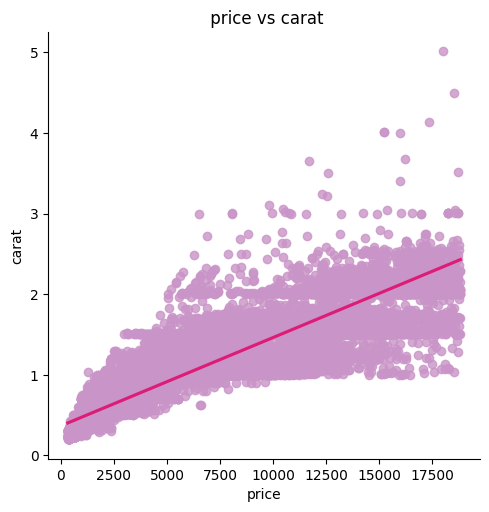

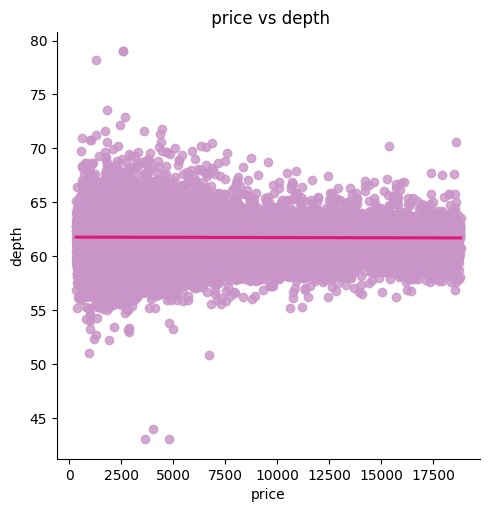

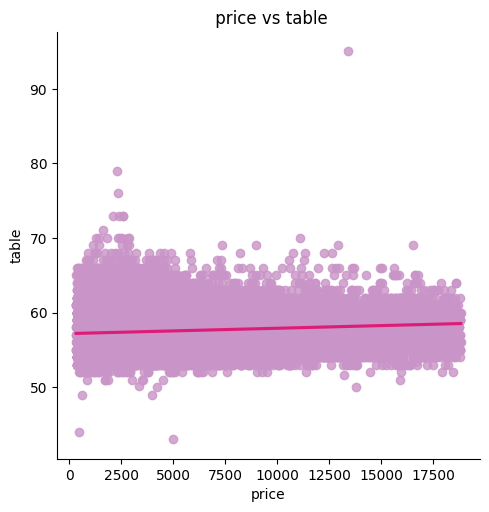

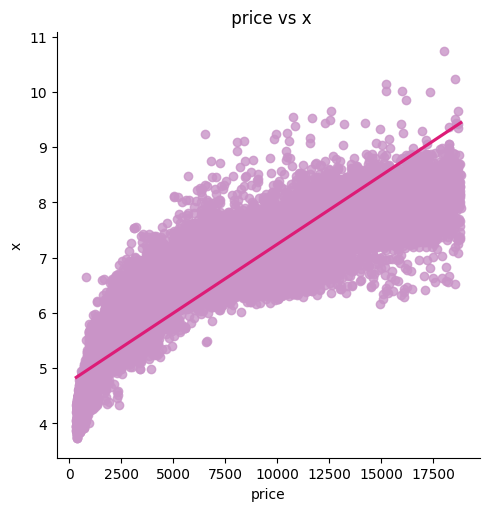

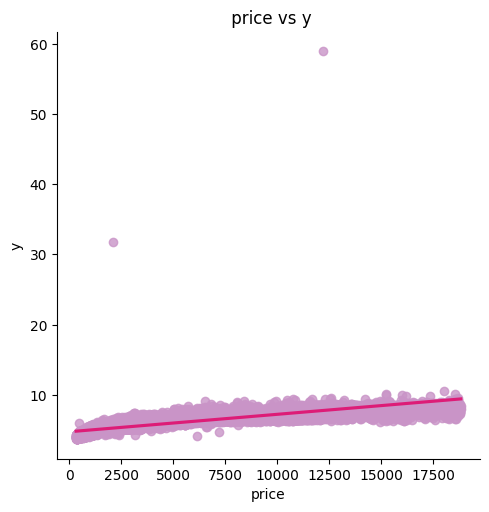

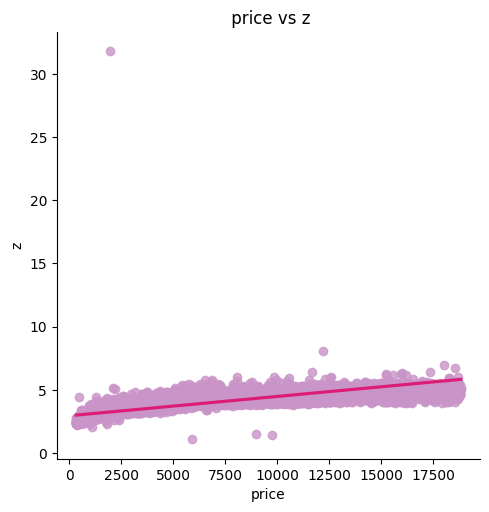

In [10]:
for i in df_num.columns:
   if(i=='price'): continue
   sns.lmplot(x="price", y=i, data=df,line_kws={'color': '#dd1c77'},scatter_kws={'color': '#c994c7'})
   plt.xlabel('price')
   plt.ylabel(i)
   plt.title(f' price vs {i}')
   plt.show()

# Display the plot

### Identifying and Removing Outliers Using Line Plots


In [28]:
df=df[(df['depth']>46)&(df['depth']<75)]
df=df[(df['table']>45)&(df['table']<80)]
df=df[(df['y']<20)]
df=df[(df['z']<10)&(df['z']>2)]



### Violin plots for categorical values:

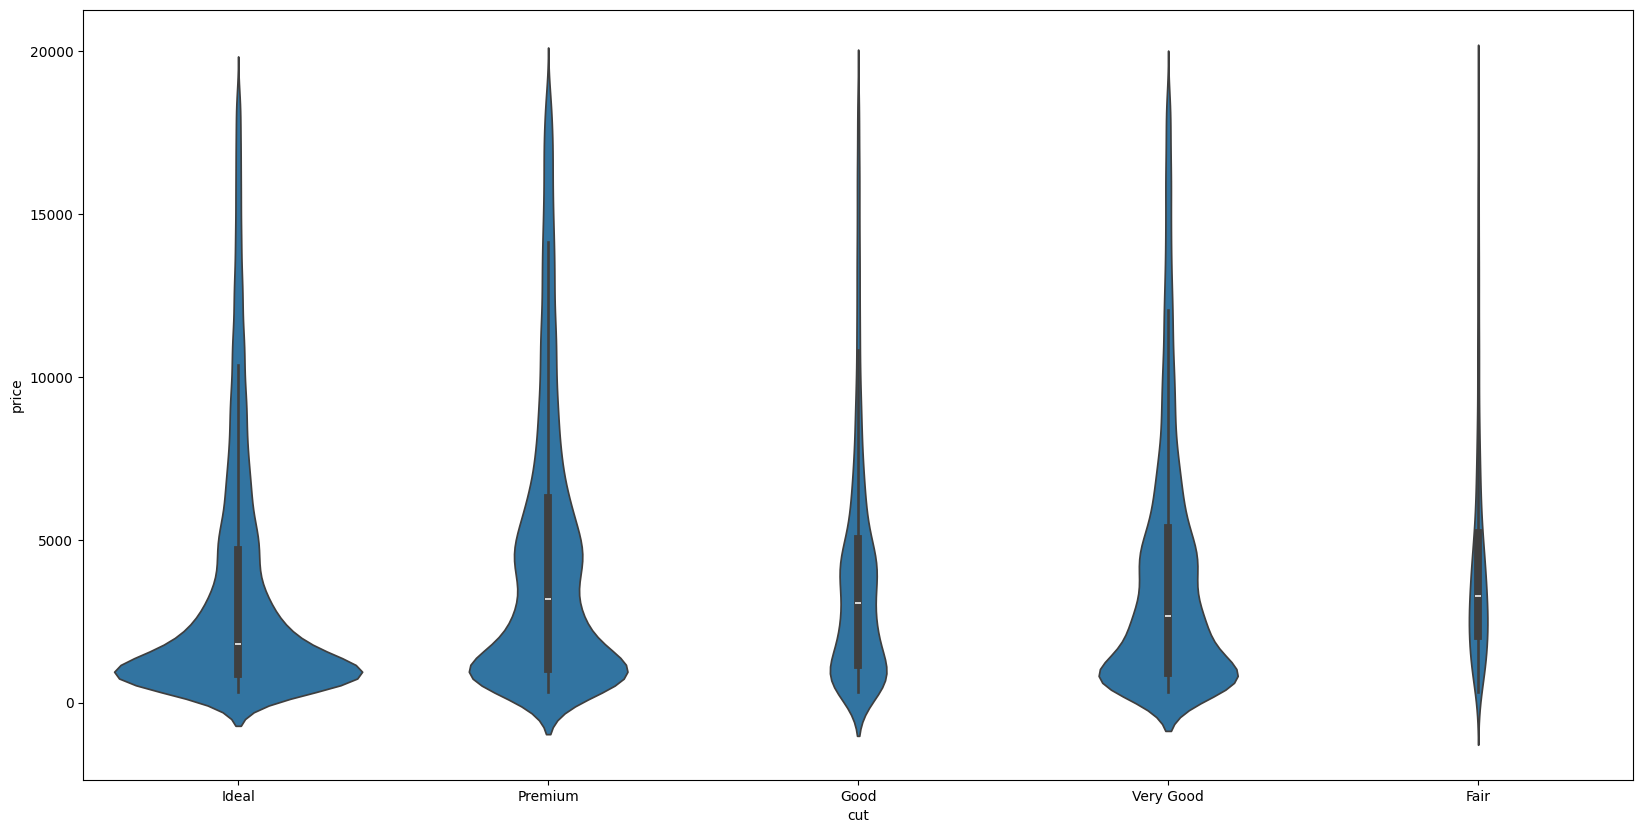

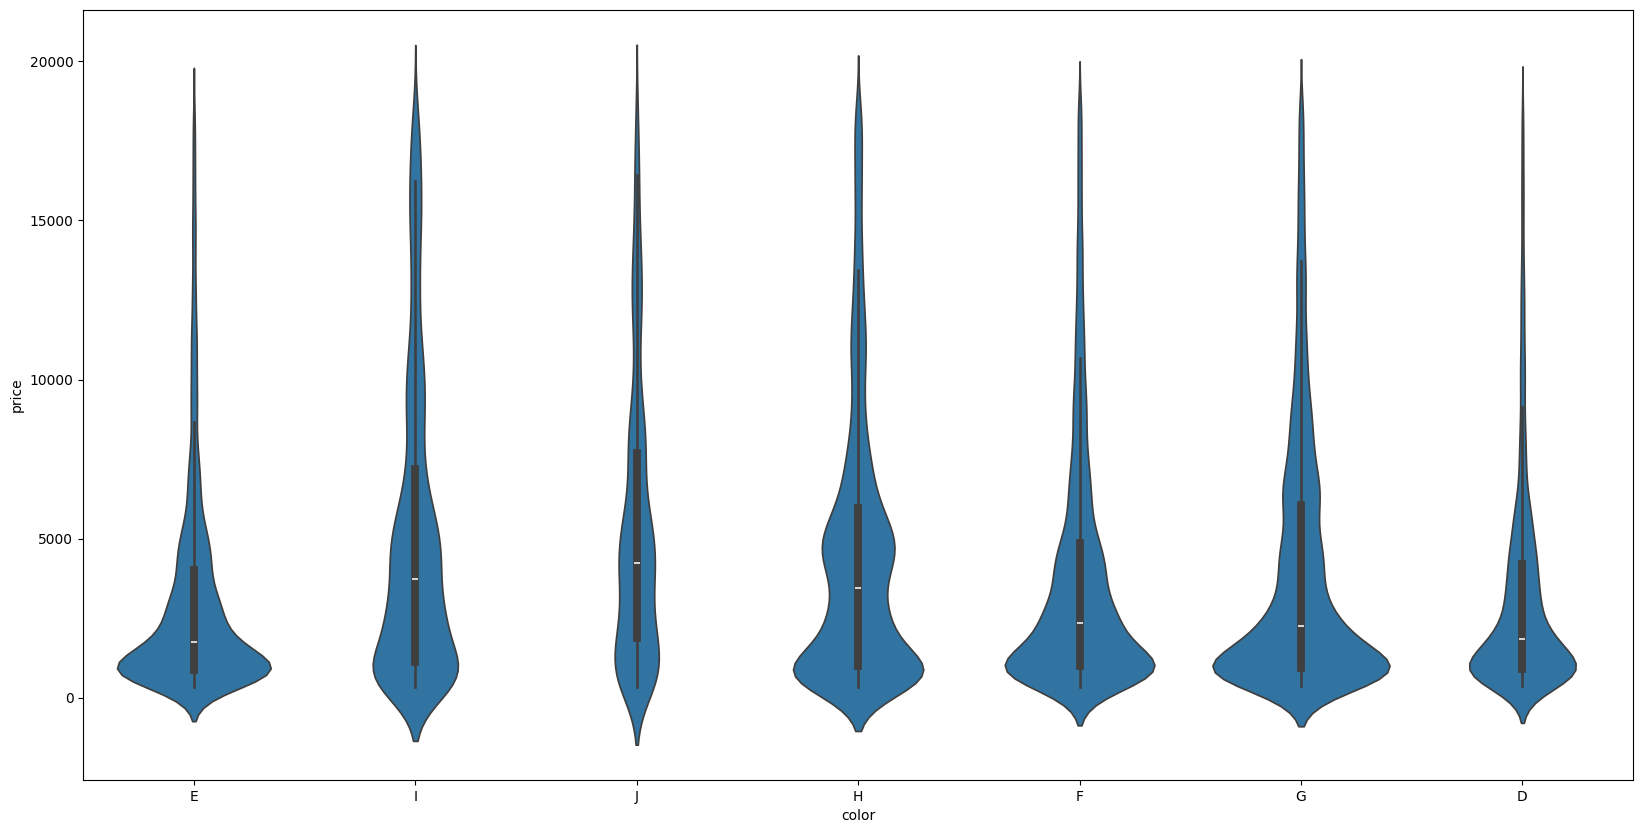

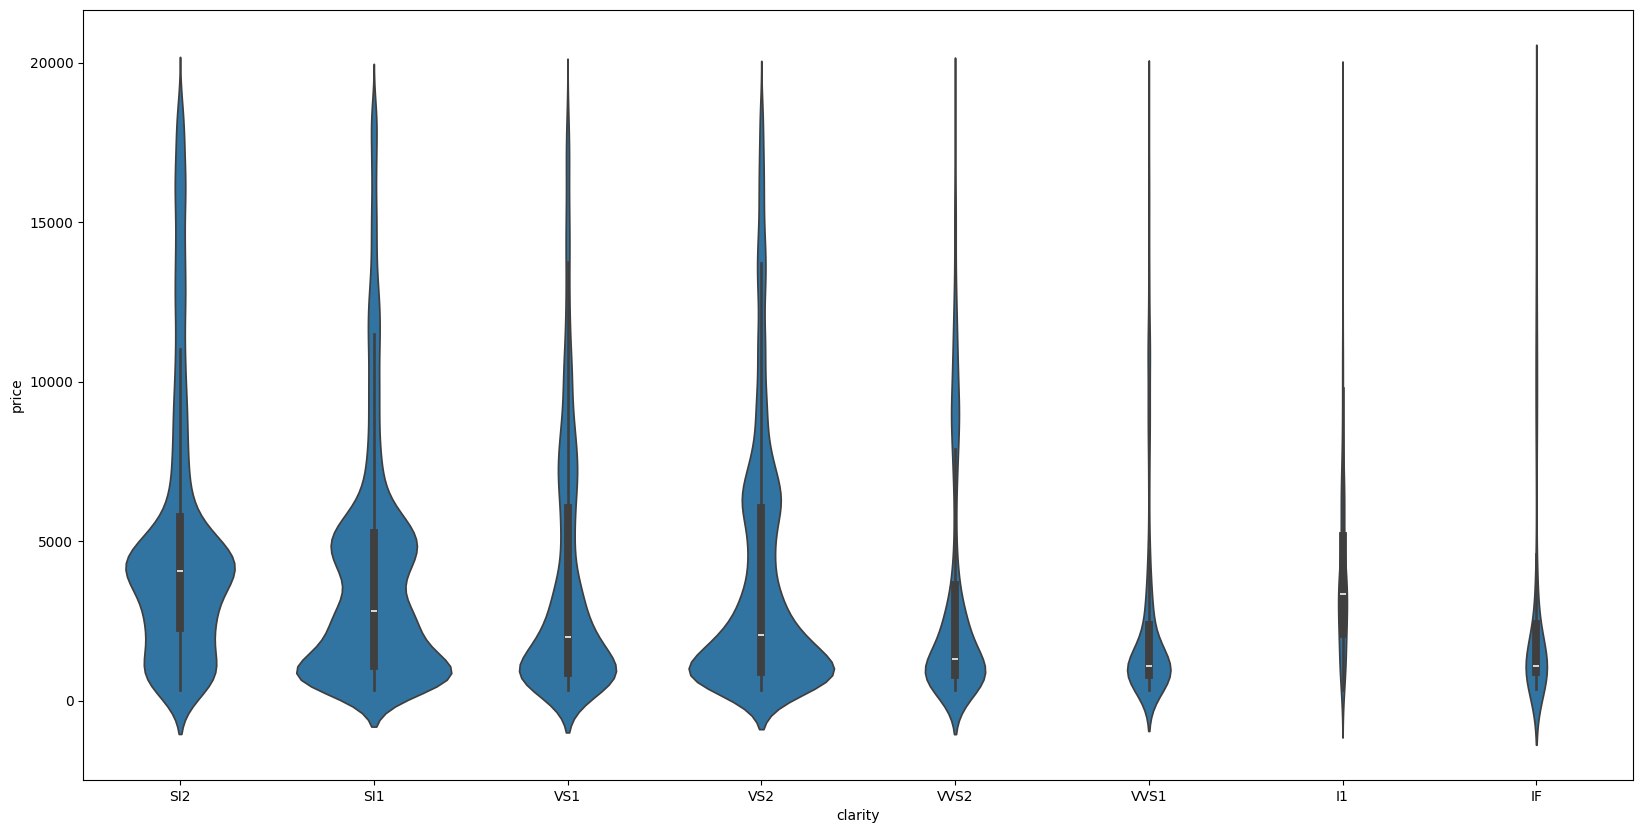

In [12]:
for i in df_cat.columns:
    if i == 'price': continue
    sns.violinplot(x=i, y='price', data=df, density_norm='count')
    plt.show()


### Encoding categorical values
Cut, color and clarity have a natural order (worst to best quality). That's why I'll use ordinal encoding.

In [29]:
df1=df.copy()
from sklearn.preprocessing import OrdinalEncoder
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
ordinal_encoder_cut = OrdinalEncoder(categories=[cut_categories])
df1['cut'] = ordinal_encoder_cut.fit_transform(df[['cut']])

color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
ordinal_encoder_color = OrdinalEncoder(categories=[color_categories])
df1['color'] = ordinal_encoder_color.fit_transform(df[['color']])

clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
ordinal_encoder_clarity = OrdinalEncoder(categories=[clarity_categories])
df1['clarity'] = ordinal_encoder_clarity.fit_transform(df[['clarity']])
df1.describe()




,carat,cut,color,clarity,depth,table,price,x,y,z
count,53905.000000,53905.000000,53905.000000,53905.000000,53905.00000,53905.000000,53905.000000,53905.000000,53905.000000,53905.000000
mean,0.797633,2.904462,3.405992,3.051591,61.74970,57.456466,3930.628810,5.731478,5.733307,3.539448
std,0.473768,1.116240,1.701273,1.647107,1.42013,2.224569,3987.246342,1.119381,1.111250,0.691433
min,0.200000,0.000000,0.000000,0.000000,50.80000,49.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,2.000000,2.000000,61.00000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,3.000000,61.80000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,5.000000,4.000000,62.50000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,73.60000,79.000000,18823.000000,10.740000,10.540000,6.980000


## Checking for correlation


<Axes: >

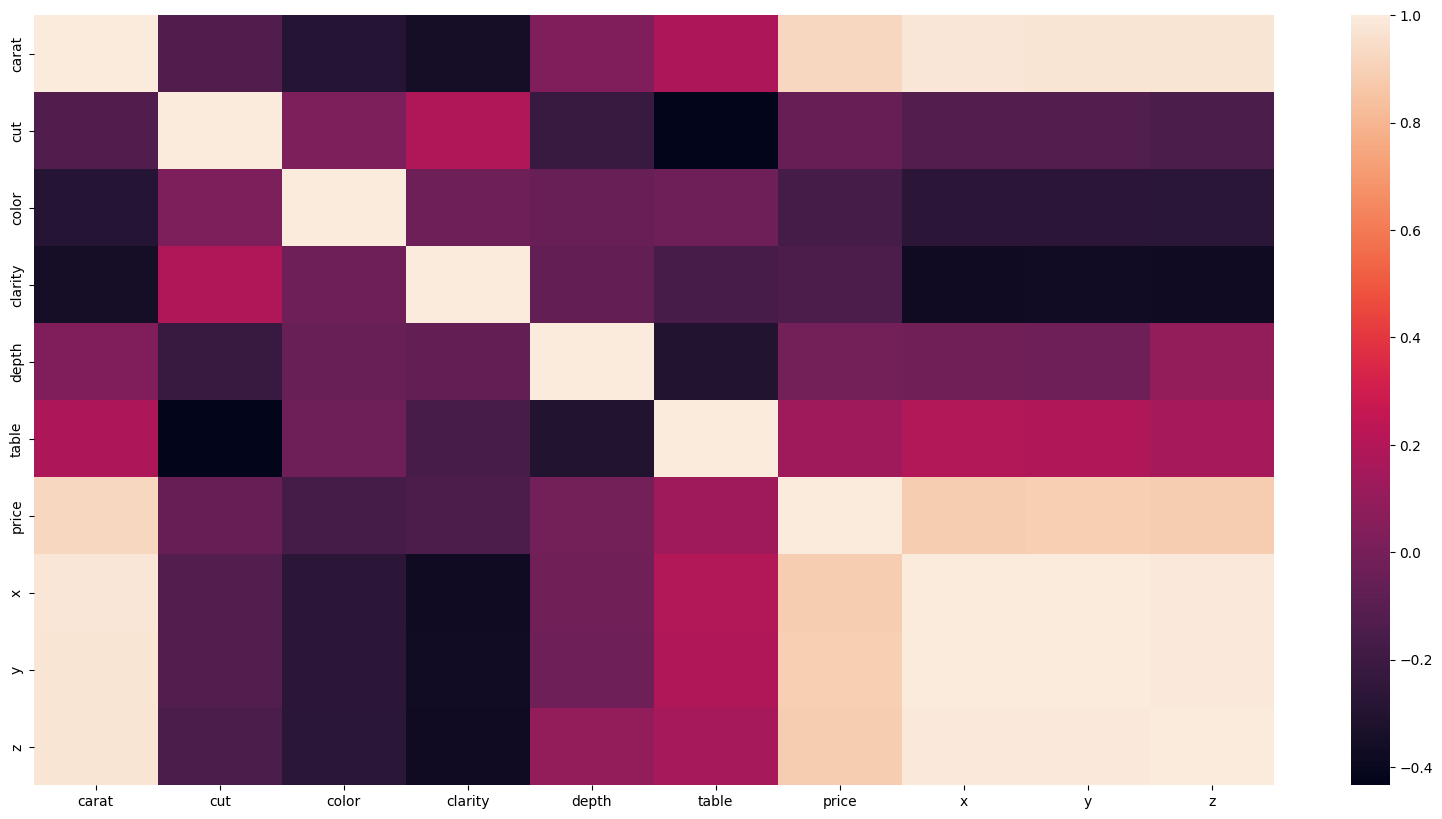

In [14]:
sns.heatmap(df1.corr())

Features carat, x, y, z are the most correlated with price.

In [15]:
df1.corr()[abs(df1.corr()['price'])<0.1]

,carat,cut,color,clarity,depth,table,price,x,y,z
cut,-0.135013,1.000000,0.020767,0.189107,-0.219424,-0.433957,-0.053558,-0.126308,-0.125950,-0.152164
depth,0.029275,-0.219424,-0.049033,-0.067901,1.000000,-0.302261,-0.010280,-0.024392,-0.027534,0.097535


A correlation coefficient between -0.1 and 0.1 is often considered to represent a very weak or negligible correlation. We can see that cut and depth are poorly correlated with the price.

### Feature Engineering
Adding diamond ratio feature:

NameError: name 'i' is not defined

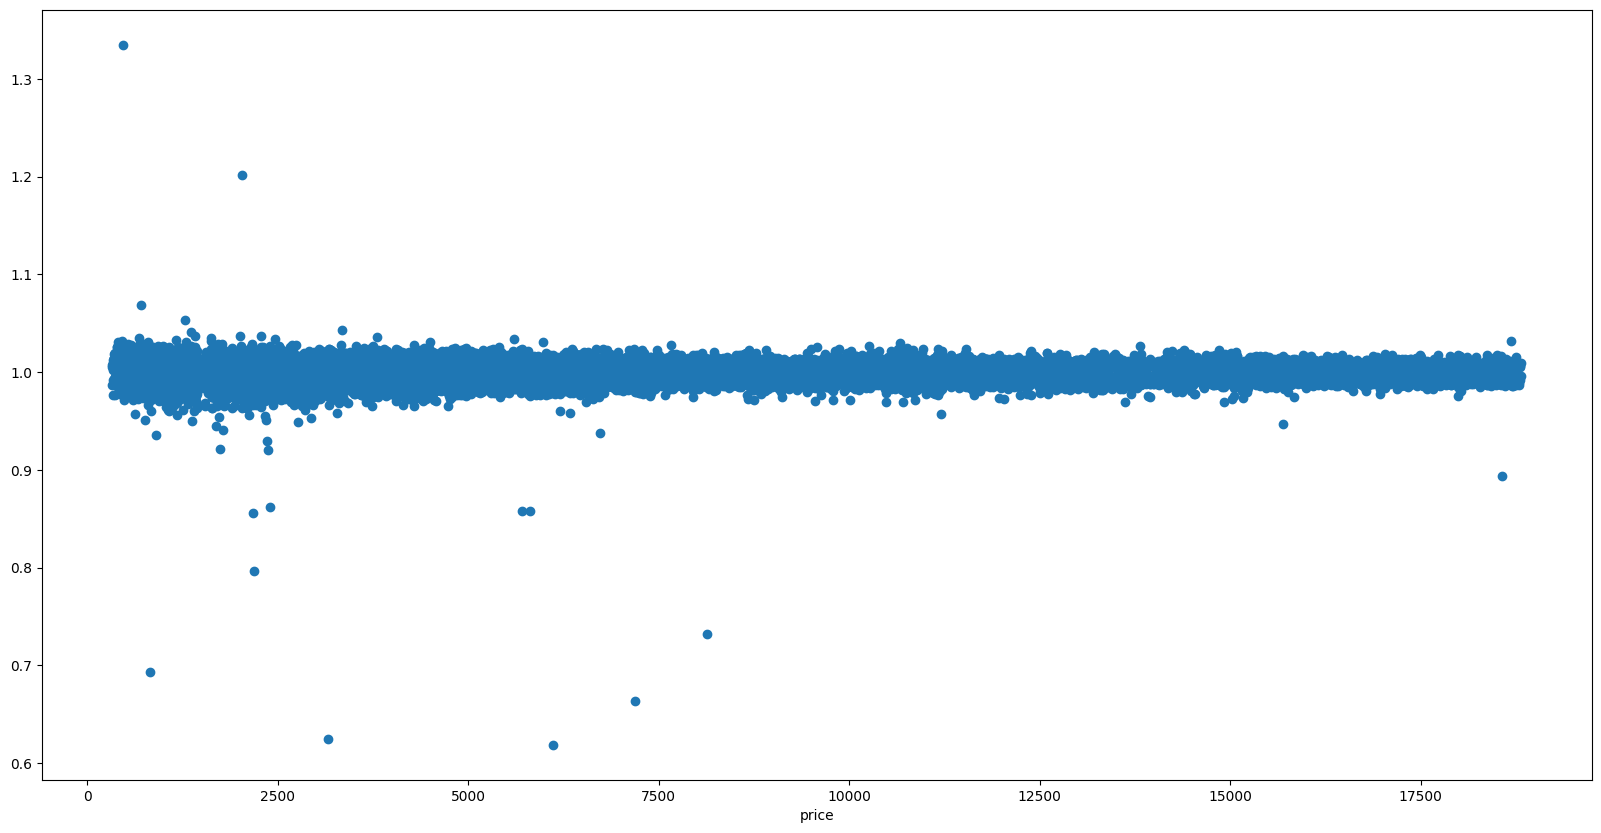

In [30]:
df1['ratio']=df1['y']/(df1['x']+0.0001)
plt.scatter(df1['price'], df1['ratio'])
plt.xlabel('price')
plt.ylabel(i)
plt.title(f' price vs ratio')
plt.show()

It won't be of use - drop that attribute.

In [31]:
df1.drop(columns=['ratio'], inplace=True)

Adding table ratio feature:

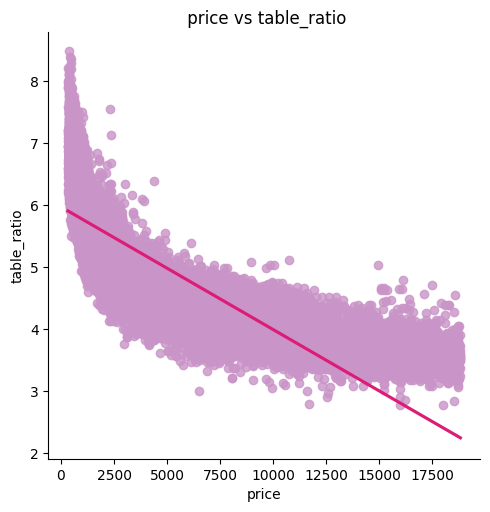

In [32]:
df1['table_ratio']= df1['table'] / (df1['x'] + df1['y'])
sns.lmplot(x="price", y='table_ratio', data=df1,line_kws={'color': '#dd1c77'},scatter_kws={'color': '#c994c7'})
plt.xlabel('price')
plt.ylabel('table_ratio')
plt.title(f' price vs table_ratio')
plt.show()

Adding diamond unit cell volume feature:

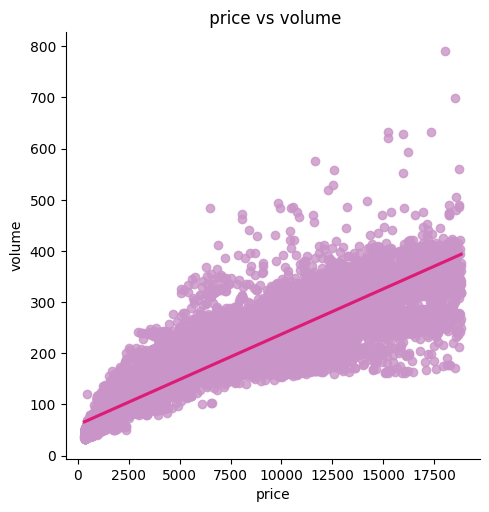

In [33]:
df1['volume'] = df1['x'] * df1['y'] * df1['z'] 
sns.lmplot(x="price", y='volume', data=df1,line_kws={'color': '#dd1c77'},scatter_kws={'color': '#c994c7'})
plt.xlabel('price')
plt.ylabel('volume')
plt.title(f' price vs volume')
plt.show()

<Axes: >

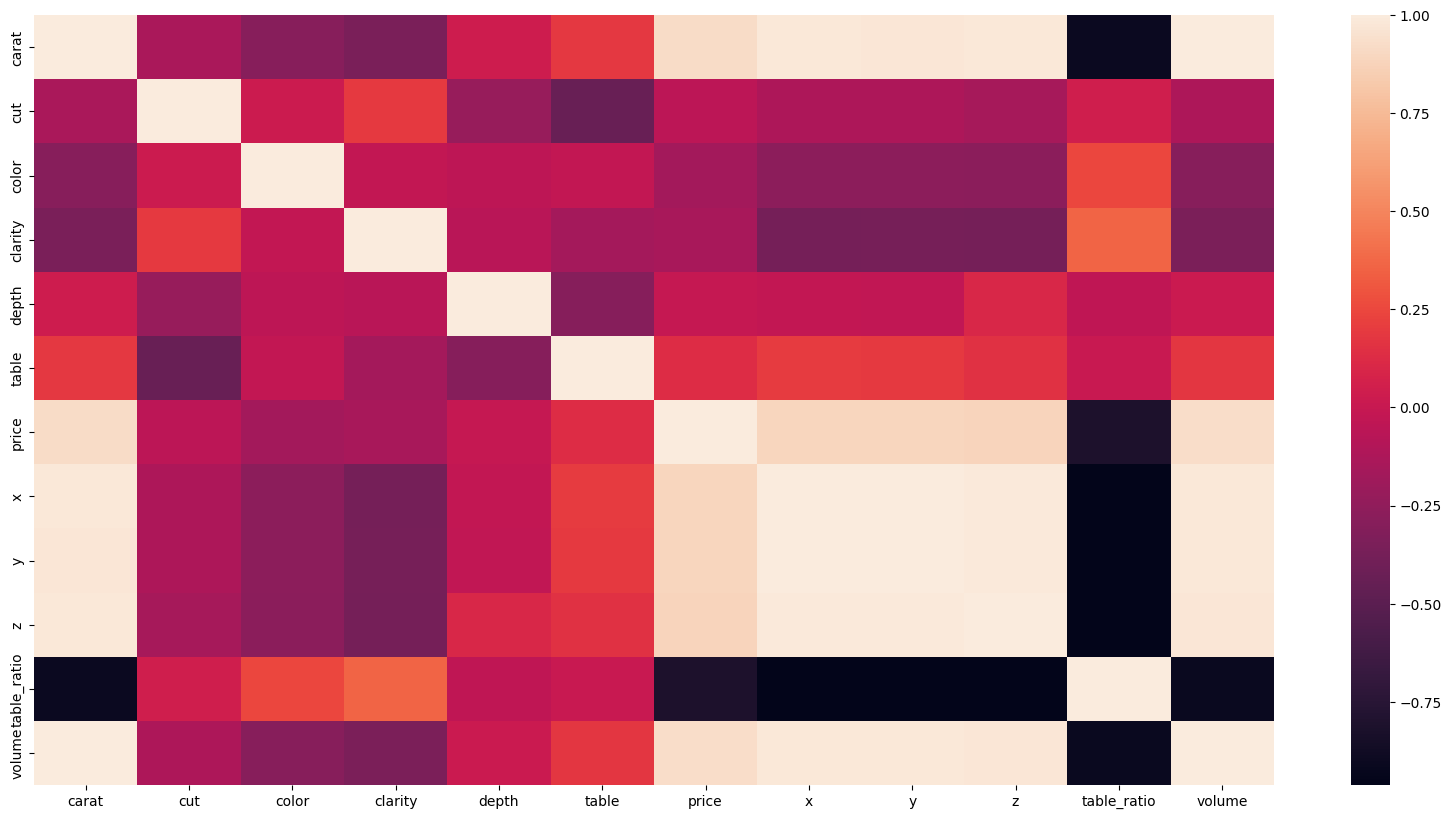

In [20]:
sns.heatmap(df1.corr())

### Histograms:

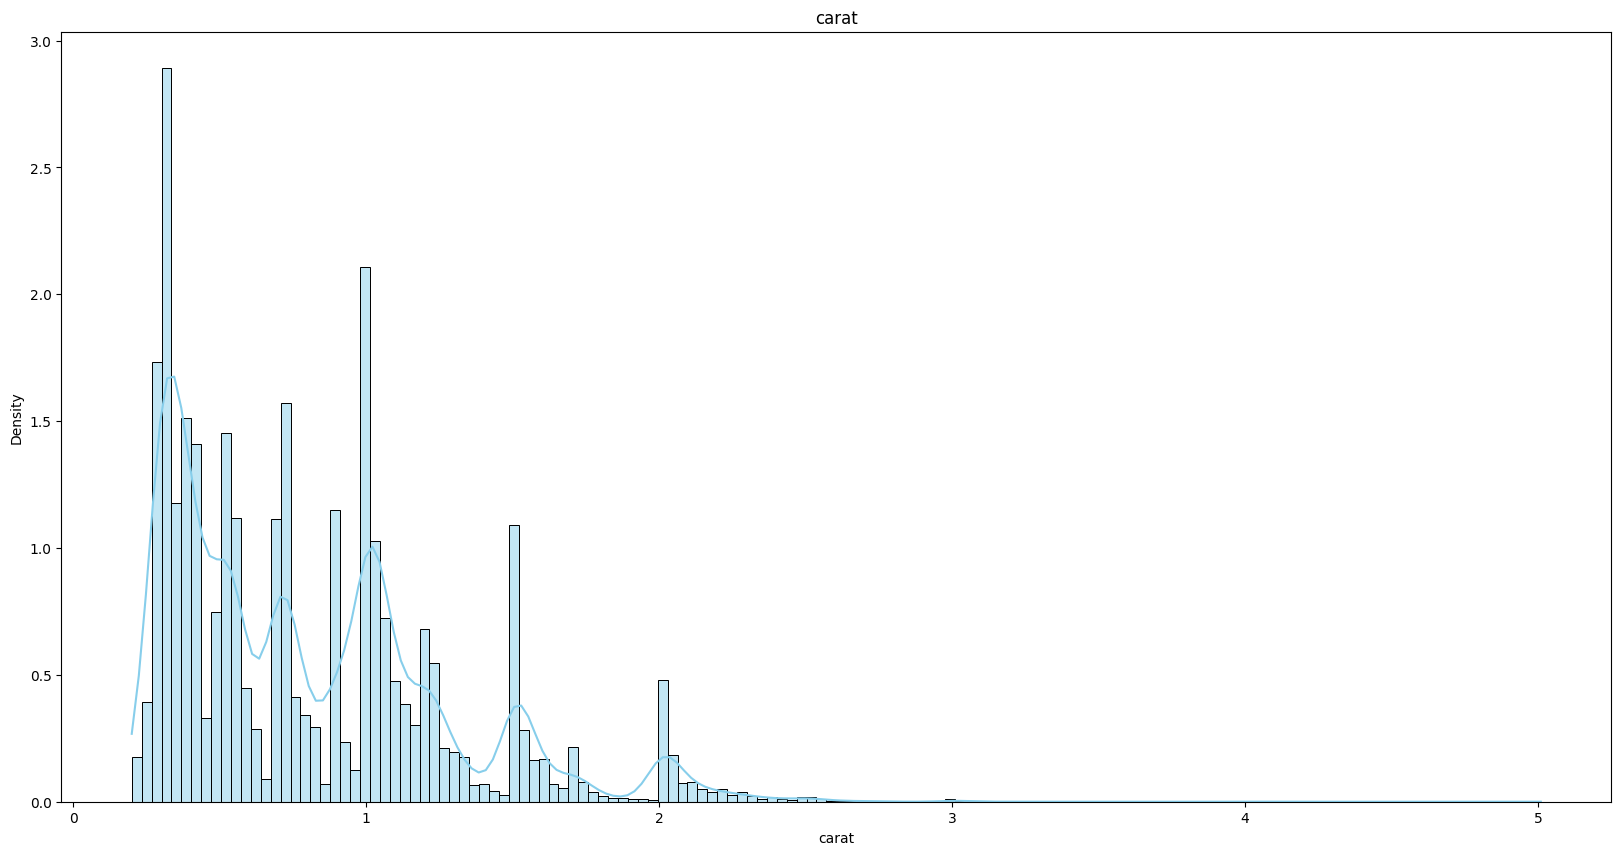

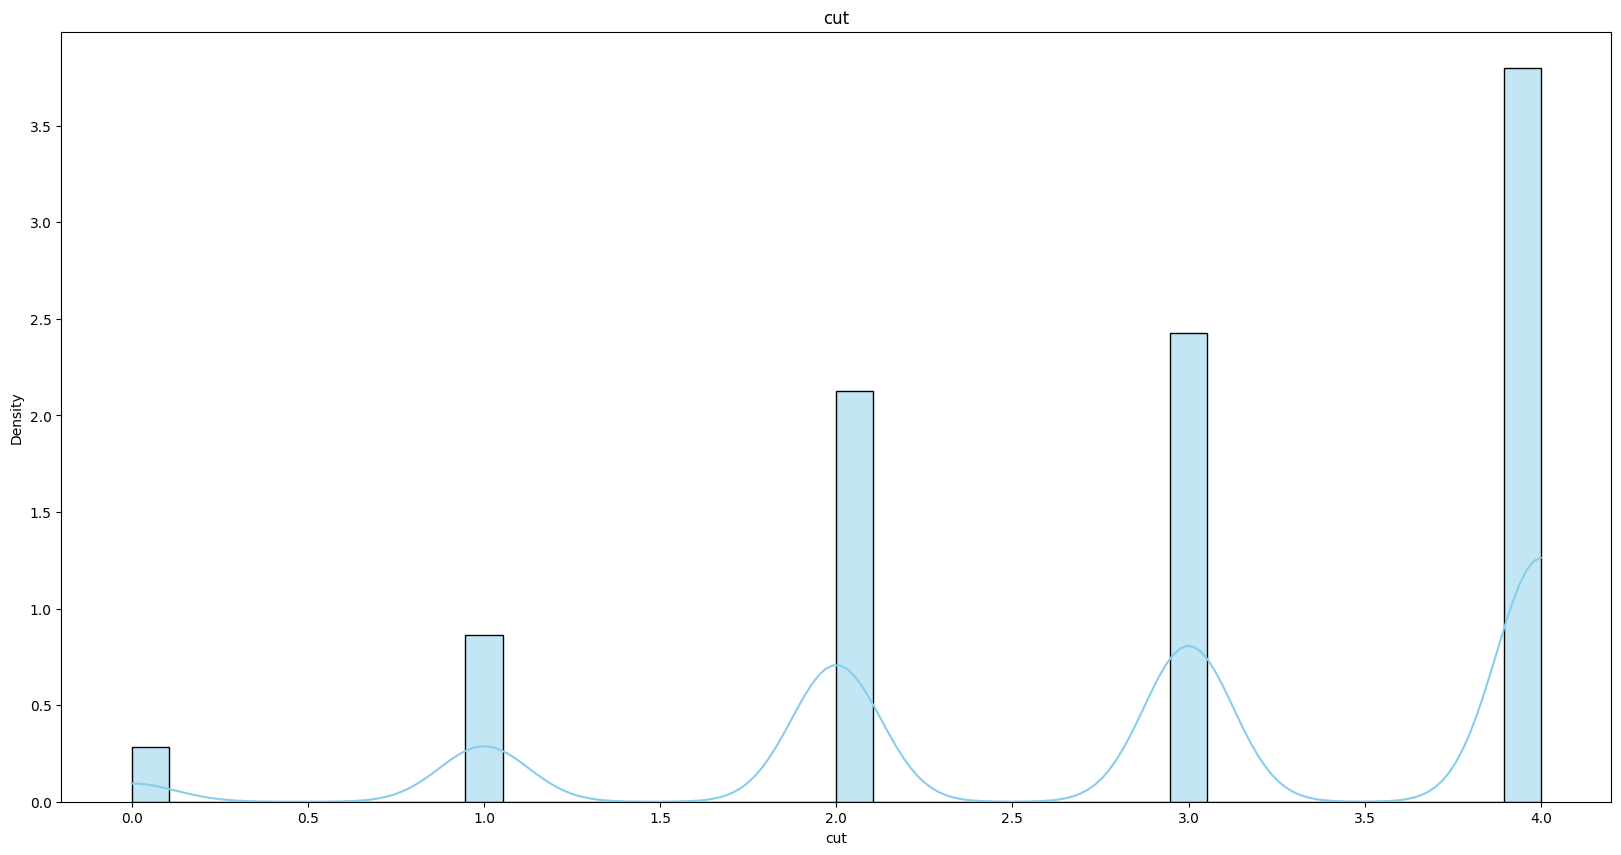

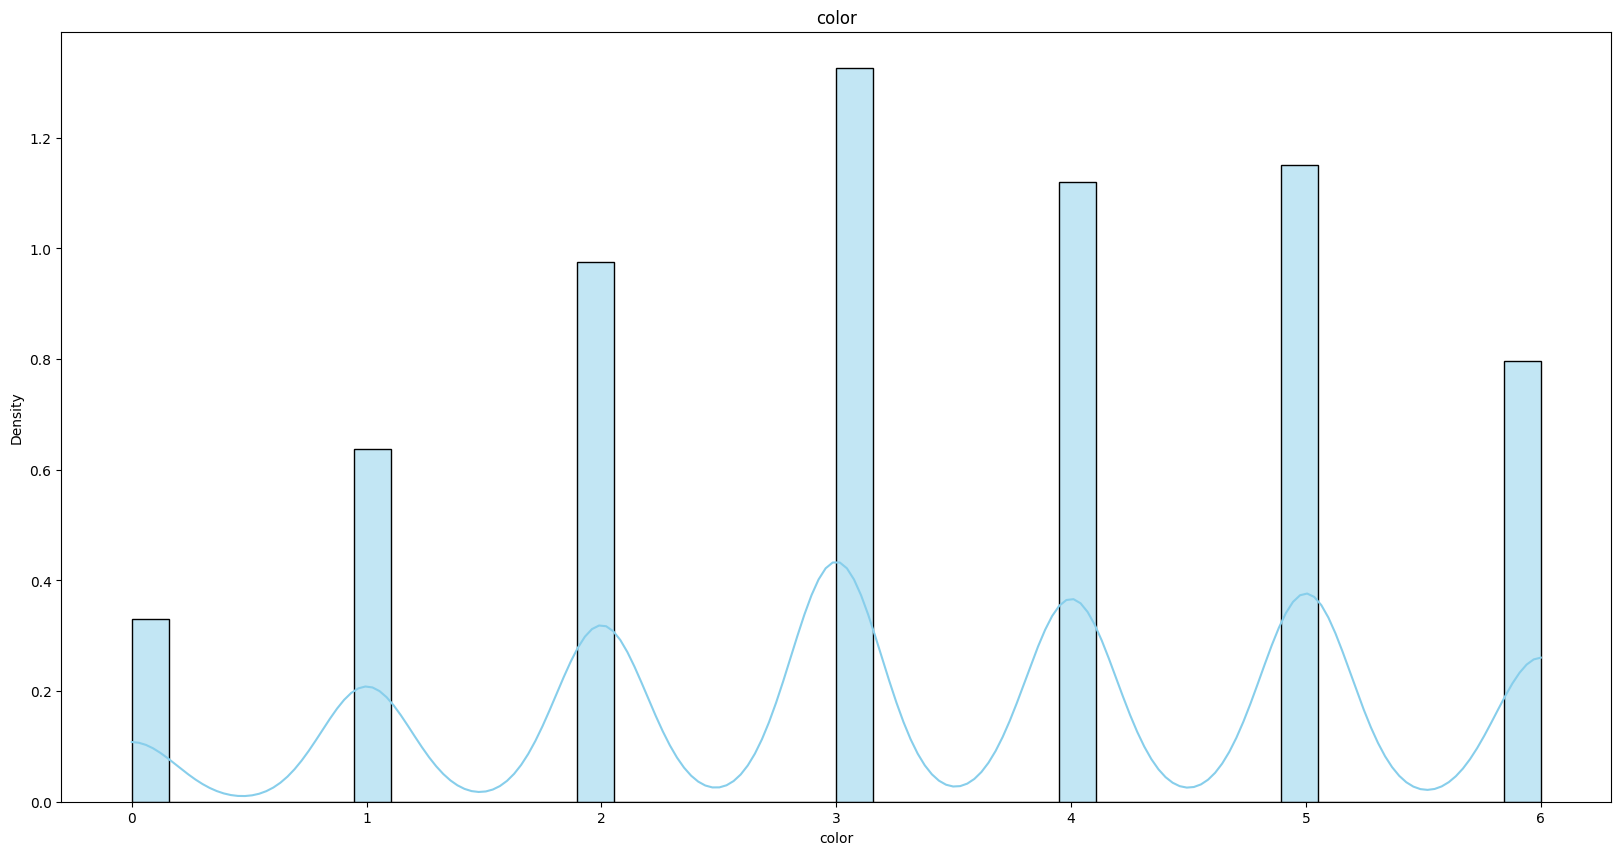

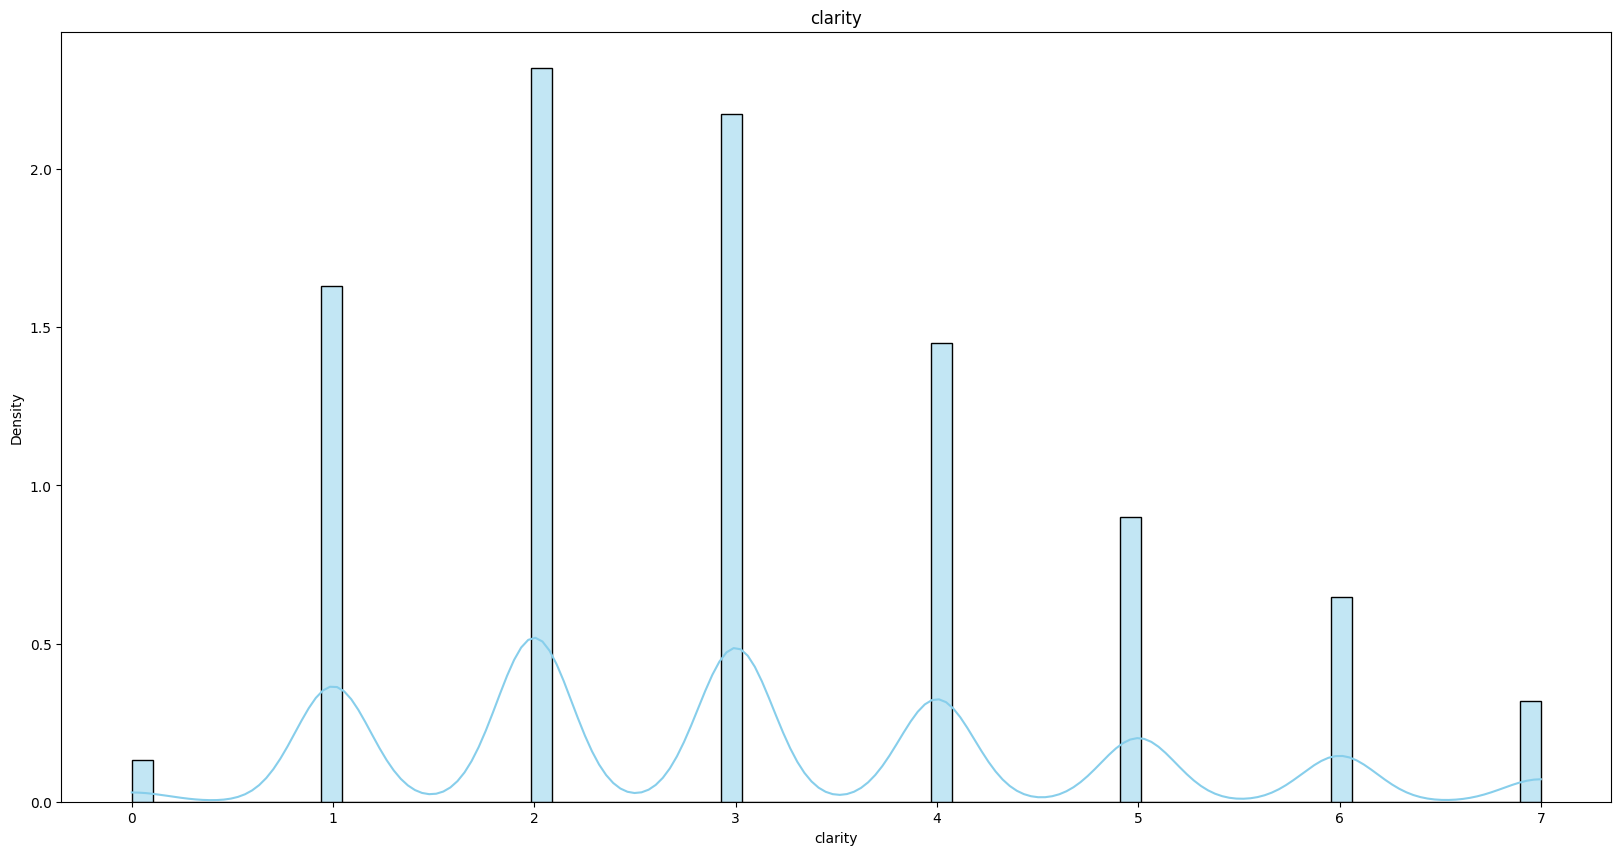

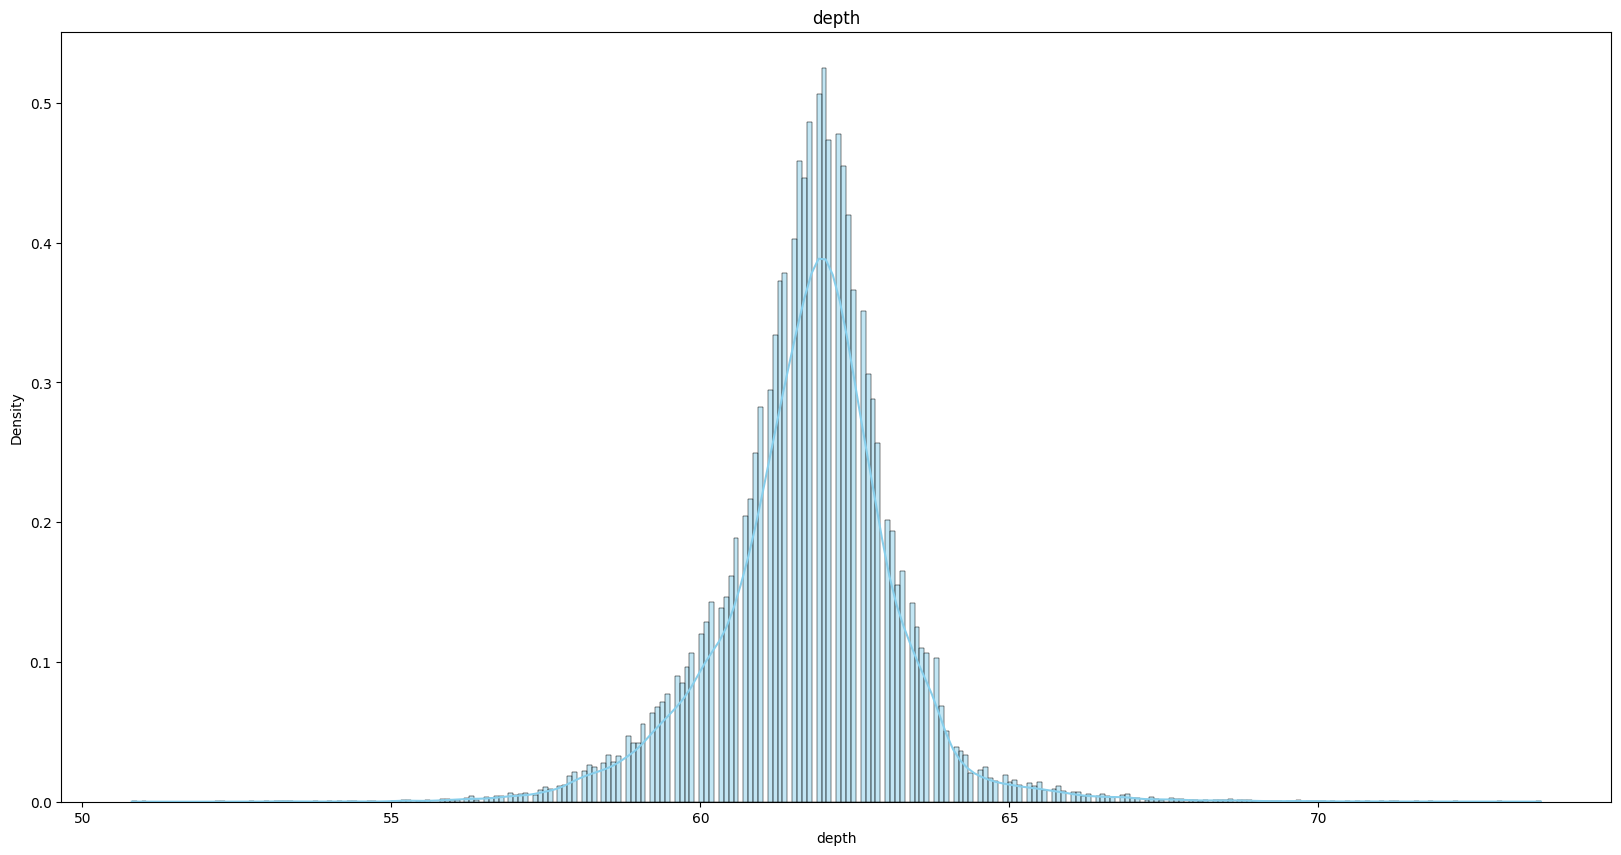

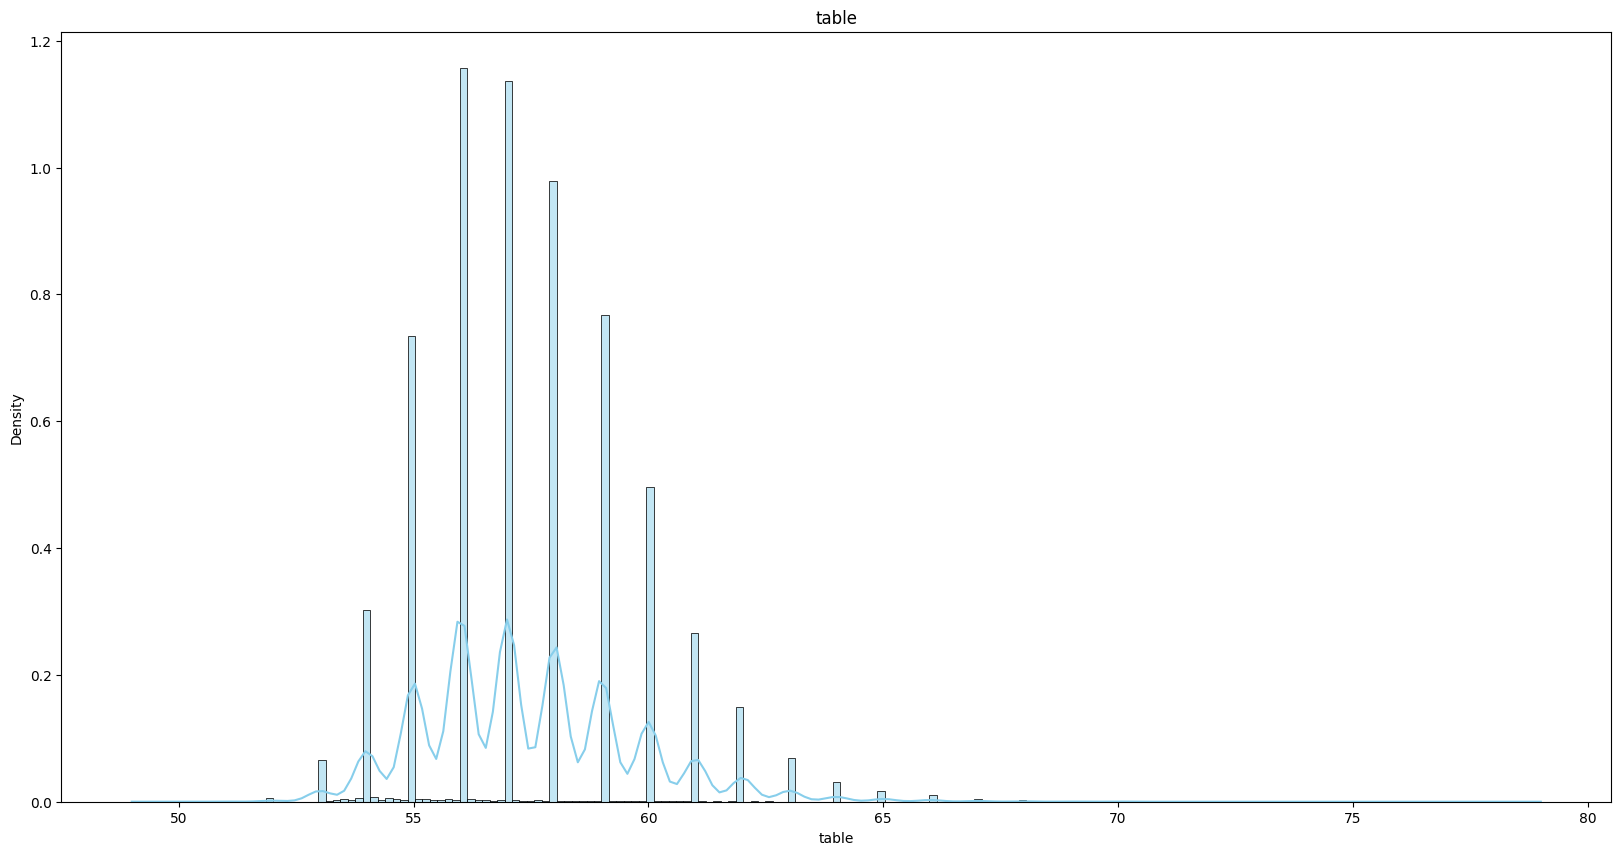

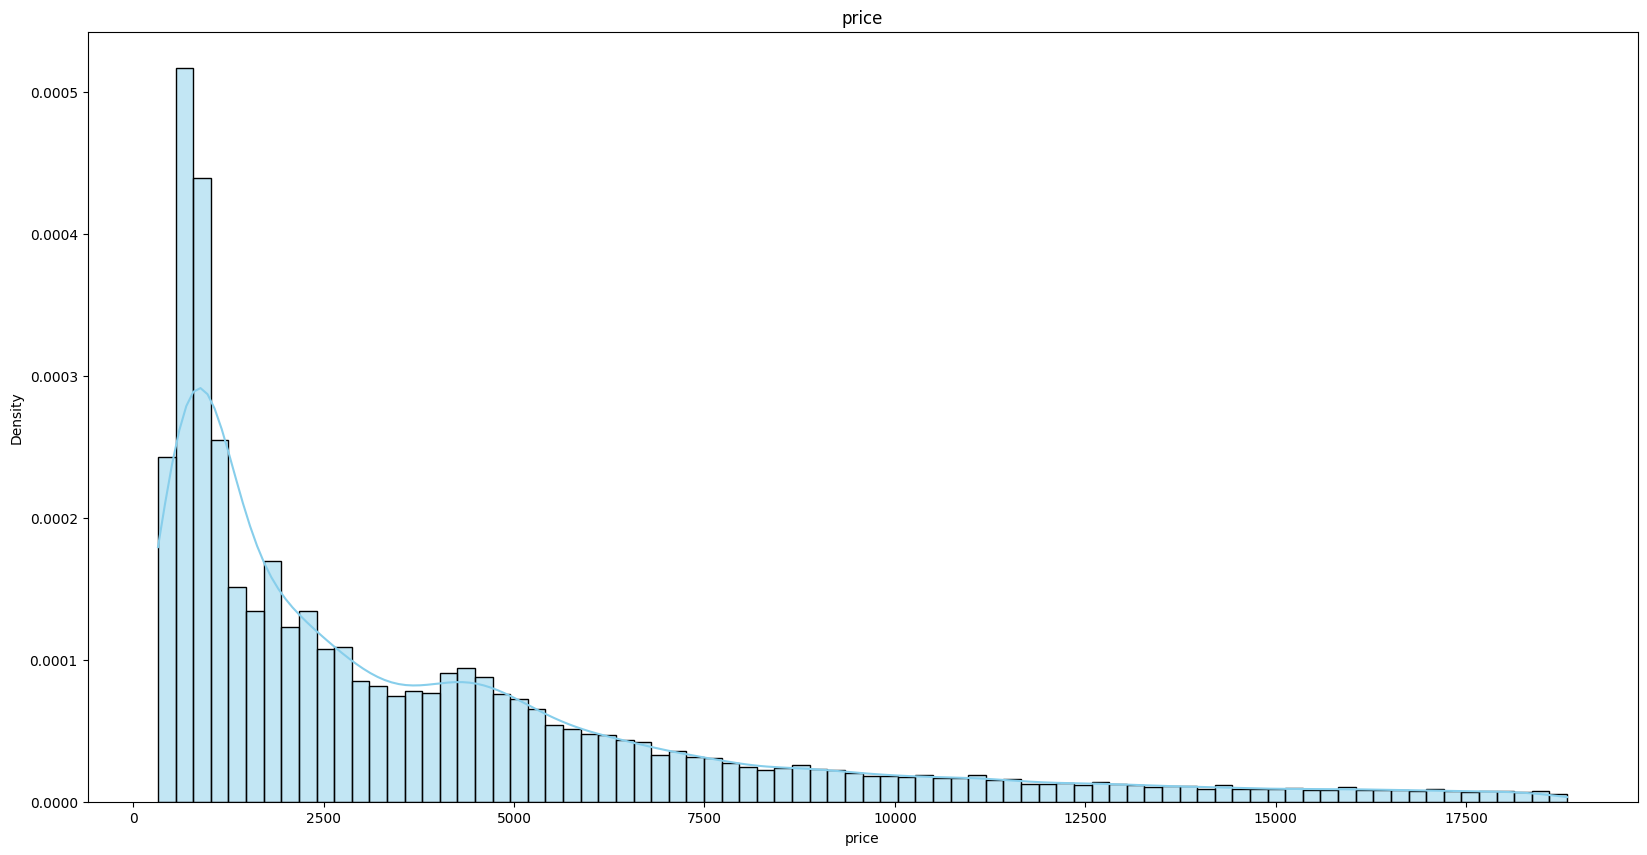

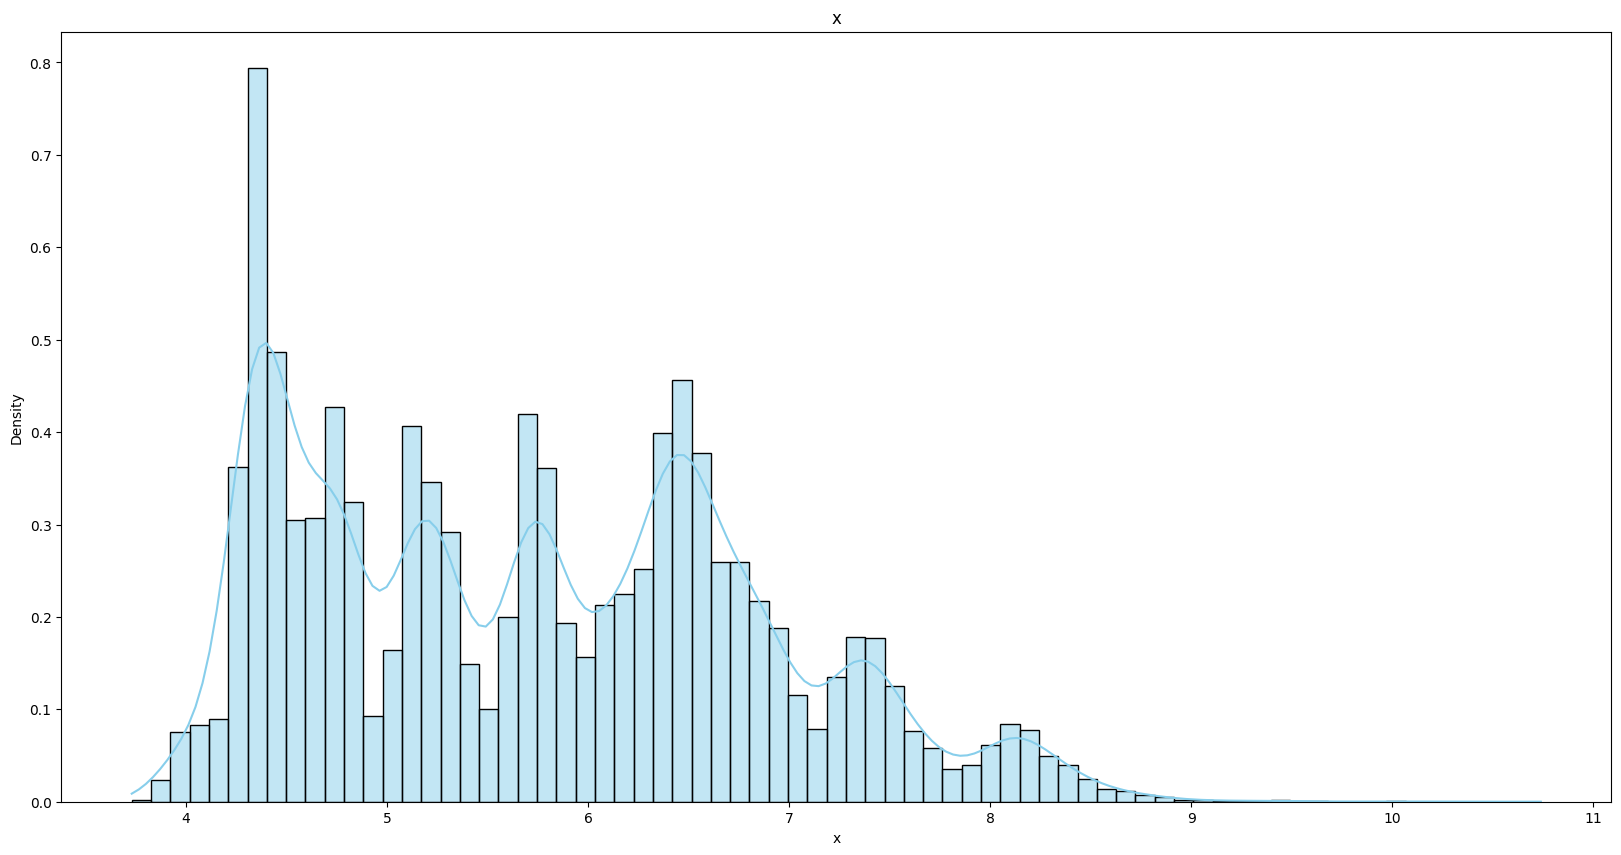

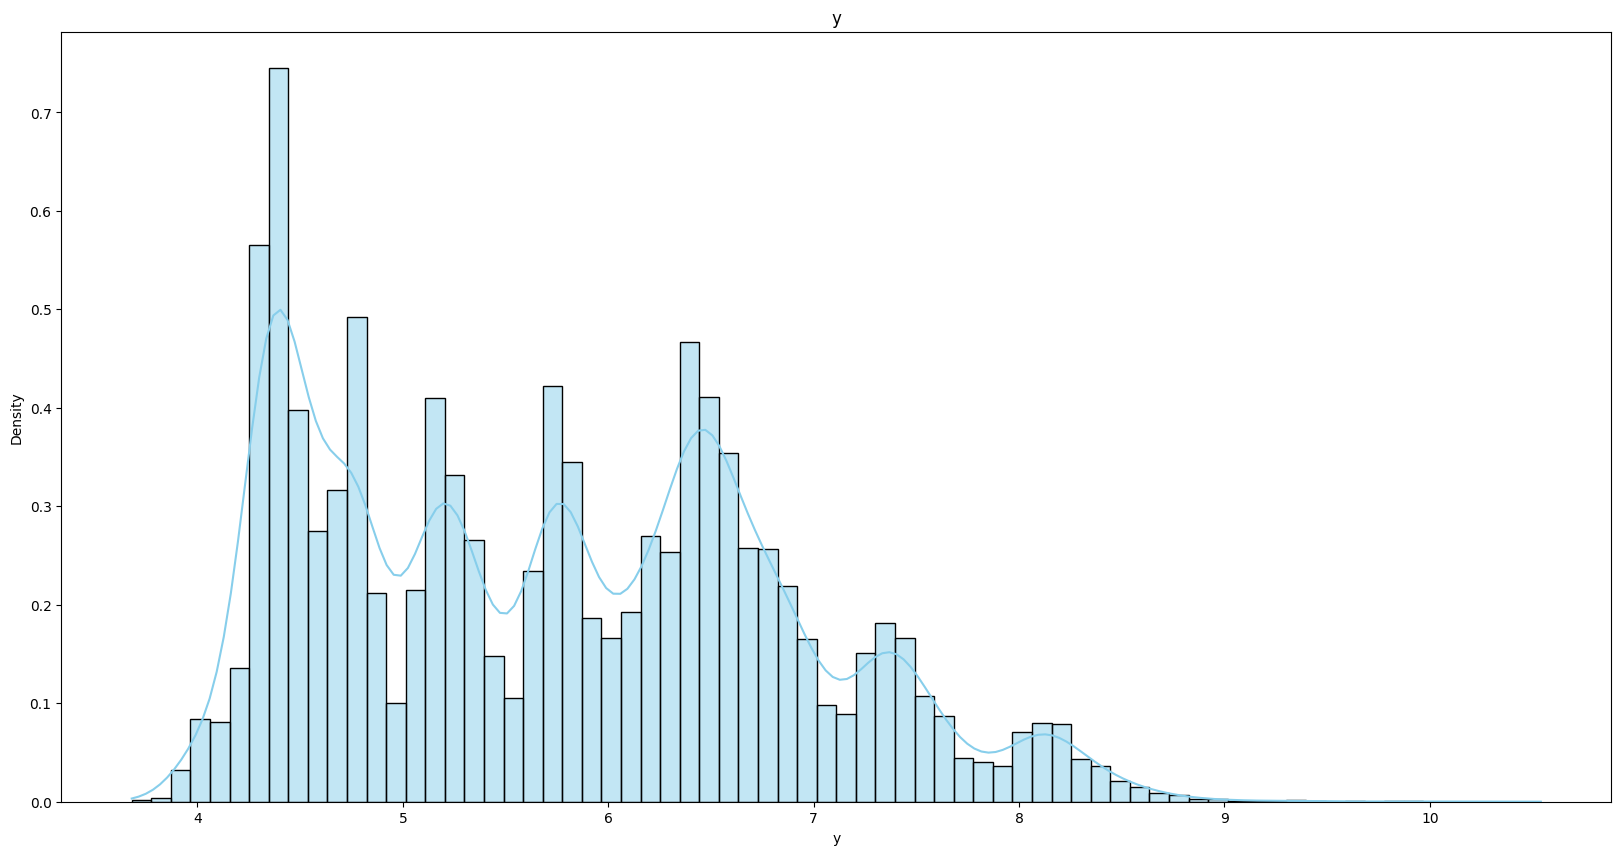

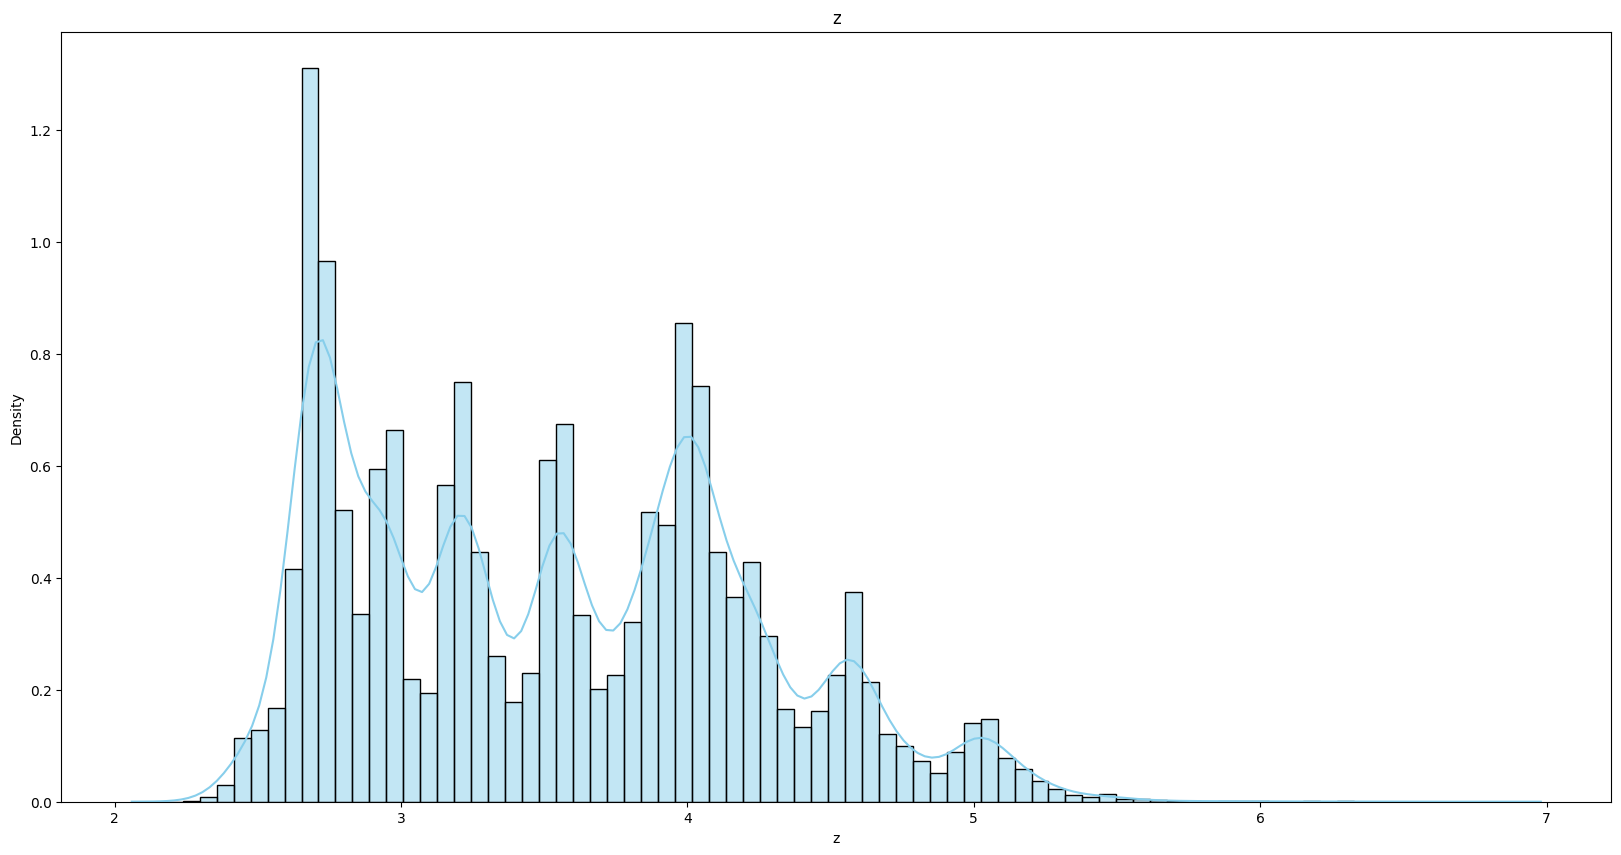

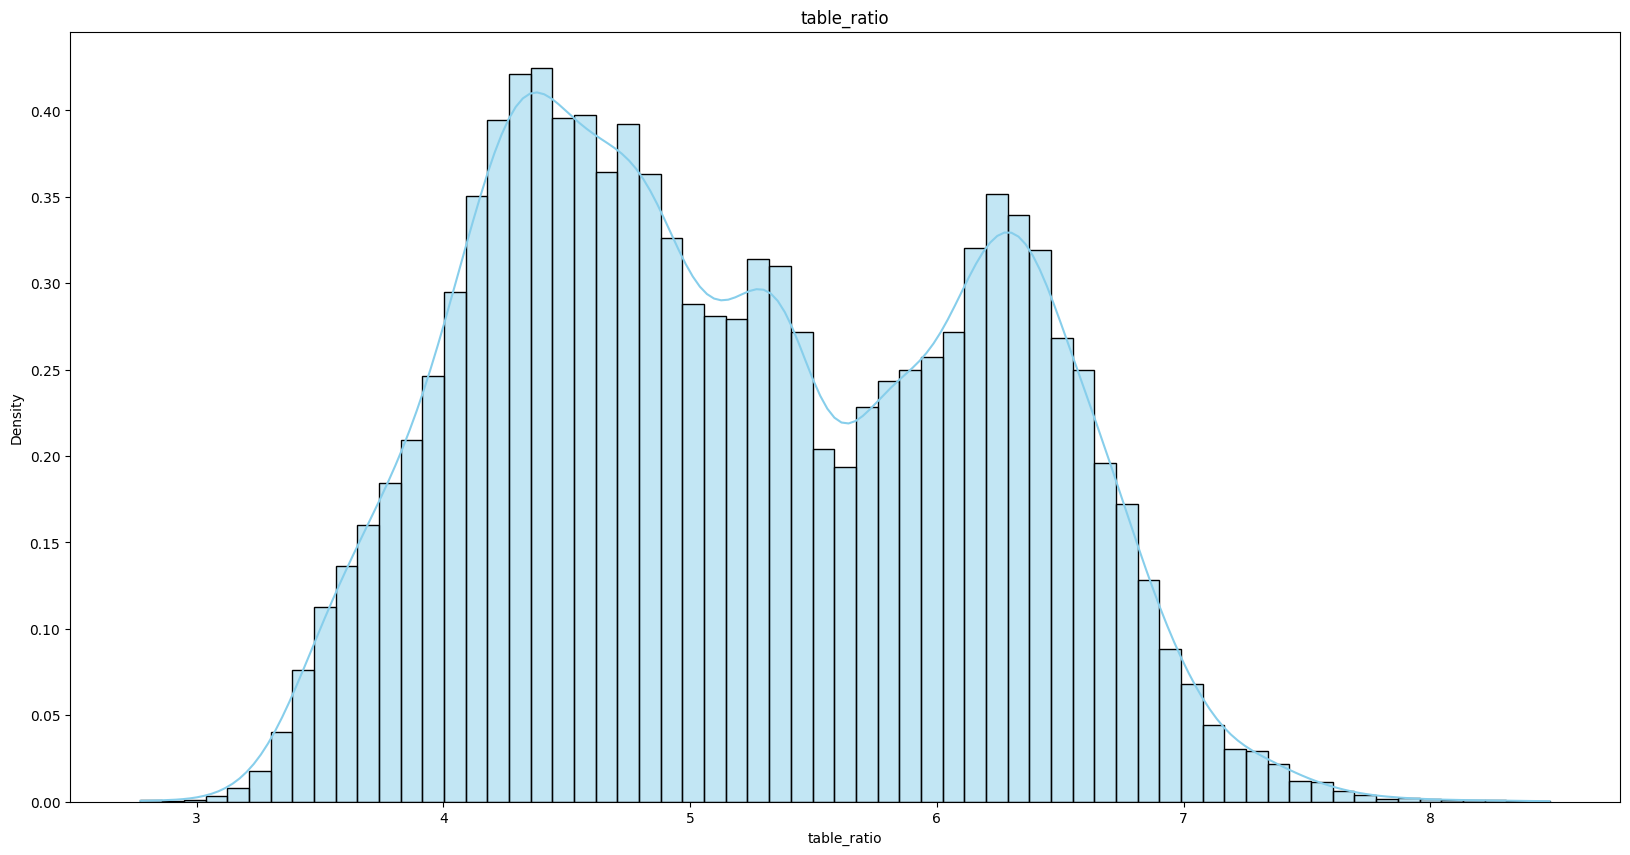

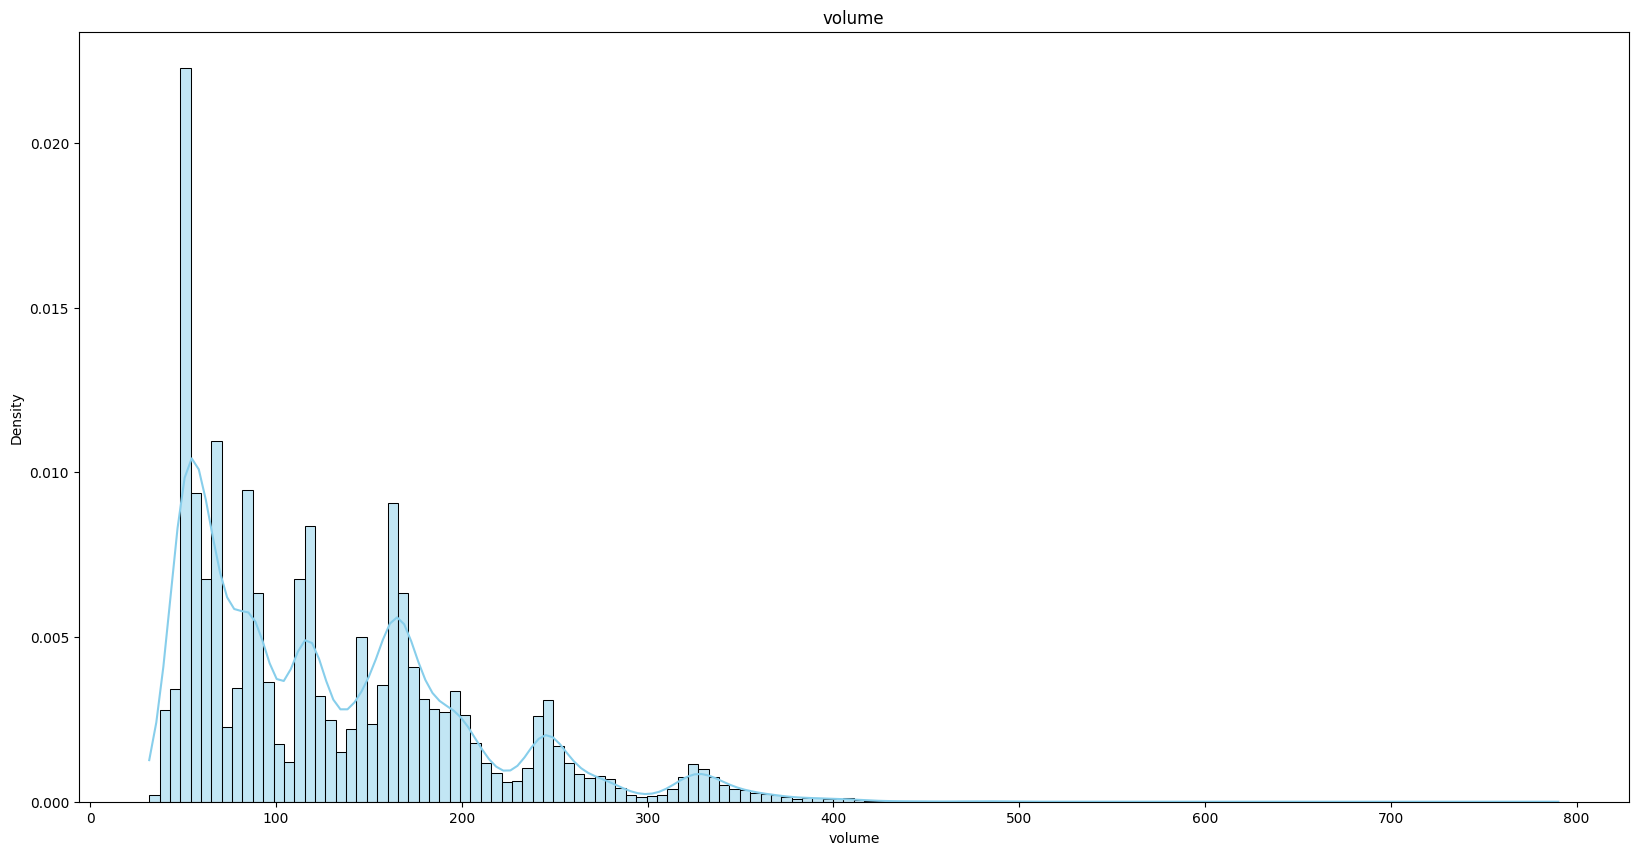

In [21]:
for i in df1.columns:
   sns.histplot(df1[i], kde=True, stat='density', color='skyblue')
   plt.title(i)
   plt.show()

Splitting data:

In [34]:
from sklearn.model_selection import train_test_split
X= df1.drop(["price"],axis =1)
y= df1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

Scaling data using z-score normalization and initializing regression models:

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor



pipeline_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

pipeline_knr = Pipeline([
    ("scaler", StandardScaler()),
    ("knr", KNeighborsRegressor())
])
pipeline_abr = Pipeline([
    ("scaler", StandardScaler()),  
    ("abr", AdaBoostRegressor())  
])              
pipeline_rfr = Pipeline([
    ("scaler", StandardScaler()),
    ("rfr", RandomForestRegressor())
])
pipeline_xgbr = Pipeline([
    ("scaler", StandardScaler()),
    ("xgbr", XGBRegressor())
])

pipelines = [pipeline_lr, pipeline_knr, pipeline_abr, pipeline_rfr, pipeline_xgbr]
pipeline_dict = {
    0: "LinearRegression",
    1: "KNeighborsRegressor",
    2: "AdaBoostRegressor",
    3: "Random forest regressor",
    4: "XGBRegressor"
}

Training the models and choosing the best one using MSE:

In [24]:
from sklearn.model_selection import cross_val_score

cv_values=[]
i=0
for pipe in pipelines:
    score = cross_val_score(pipe, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_values.append(-1*score.mean())
    print(f"{pipeline_dict[i]} cv score: {cv_values[i]}")
    i+=1
best_model_index = np.argmin(cv_values)

best_model_name = pipeline_dict[best_model_index]
print(f"\nBest Model: {best_model_name} (cv score: {cv_values[best_model_index]})")


LinearRegression cv score: 1162.2591585813675
KNeighborsRegressor cv score: 699.5651188431128
AdaBoostRegressor cv score: 1162.3919399358524
Random forest regressor cv score: 536.6111212219769
XGBRegressor cv score: 535.5681413013463

Best Model: XGBRegressor (cv score: 535.5681413013463)


Training the best model and tuning parameters:

In [75]:
from sklearn.metrics import r2_score
from sklearn import metrics
pipeline_xgbr_final = Pipeline([
    ('scaler', StandardScaler()),  
    ('xgbr', XGBRegressor(objective='reg:squarederror',
    n_estimators=100,           
    max_depth=7,                 
    learning_rate=0.1,            
    subsample=0.95,                  
    colsample_bytree=0.8,           
    random_state=42,
    ))  
])
pipeline_xgbr_final.fit(X_train, y_train)
y_pred = pipeline_xgbr_final.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
print("R^2 Score:", r2)




R^2 Score: 0.9819447491295292


R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

   

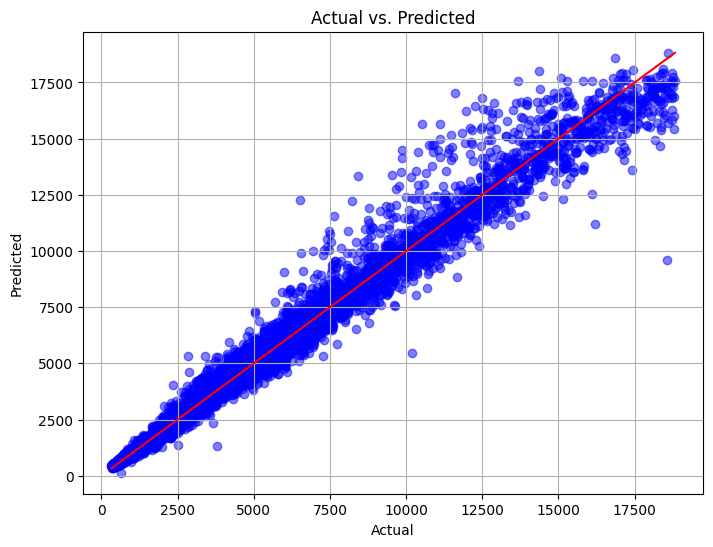

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

In [63]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

def predict(carat,cut,color,clarity,table,x,	y,z,depth=0.0):
   if(depth==0):
      depth=2*z/x+y
   x_test=np.zeros((11))
   x_test[0]=carat
   x_test[1]=ordinal_encoder_cut.transform(np.array([[cut]]))[0].item()
   x_test[2]=ordinal_encoder_color.transform(np.array([[color]]))[0].item()
   x_test[3]=ordinal_encoder_clarity.transform(np.array([[clarity]]))[0].item()
   x_test[4]=depth
   x_test[5]=table
   x_test[6]=x
   x_test[7]=y
   x_test[8]=z
   x_test[9]=table/(x+y)
   x_test[10]=x*y*z

   return pipeline_xgbr_final.predict([x_test])[0]


In [64]:
predict(carat=3.23,	cut='Ideal',color='D',	clarity='IF',	depth=61.5 ,table=55.0,x=3.95,	y=3.98,	z=2.43)

6986.4634

Save the model to a file

In [40]:
import pickle
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(pipeline_xgbr_final, f)


In [35]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
columns['cut_categories'] = [col.lower() for col in cut_categories]
columns['clarity_categories'] = [col.lower() for col in clarity_categories]
columns['color_categories'] = [col.lower() for col in color_categories]
with open("../model/columns.json","w") as f:
    f.write(json.dumps(columns))

In [18]:
columns = {
    'cut_categories' : [col.lower() for col in cut_categories]
}
with open("../model/columns.json","w") as f:
    f.write(json.dumps(columns))


columns = {
    'clarity_categories' : [col.lower() for col in clarity_categories]
}
with open("../model/columns.json","w") as f:
    f.write(json.dumps(columns))

   
columns = {
    'color_categories' : [col.lower() for col in color_categories]
}
with open("../model/columns.json","w") as f:
    f.write(json.dumps(columns))